## **Task 1: EDA and Visualization of a Real-World Dataset**
**Description:**
Perform exploratory data analysis (EDA) on a dataset such as the Titanic Dataset or Airbnb
Listings Dataset.
**Steps:**
1. **Load the Dataset:** Use Pandas to load and explore the dataset.
2. **Data Cleaning:**
* Handle missing values using imputation techniques or removal.
* Remove duplicates.
* Identify and manage outliers using statistical methods or visualizations.
3. **Visualizations:**
* Create bar charts for categorical variables.
* Plot histograms for numeric distributions.
* Generate a correlation heatmap for numeric features.
4. **Summarize Insights:**
* Document your findings and observations in a clear and concise
manner.

**Outcome:**
* A Jupyter Notebook or Python script containing the EDA process, visualizations, and
detailed insights.

# **Load Dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')
print ("Dataset shape:",df.shape)
df.head()


Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Cleaning:**

In [3]:
print("missing value:", df.isnull().sum())

missing value: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'cabin'in df.columns:
  df.drop(columns=['Cabin'])
print(df.isnull().sum)

# remove duplicates
df.drop_duplicates(inplace=True)

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

**Identify and manage outliers using statistical methods or visualizations.**

In [5]:
# IQR method for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_outliers = df[(df['Fare'] < Q1 - 1.5 * IQR) & (df['Fare'] > Q3 + 1.5 * IQR)]

# Remove outliers in 'Fare'
df = df[~df.index.isin(fare_outliers.index)]
print("Shape after outlier removal in Fare:", df.shape)


Shape after outlier removal in Fare: (891, 12)


# **Visualizations:**

**Create bar charts for categorical variables.**
1. Survived
2. Gender Distribution
3. Embarked

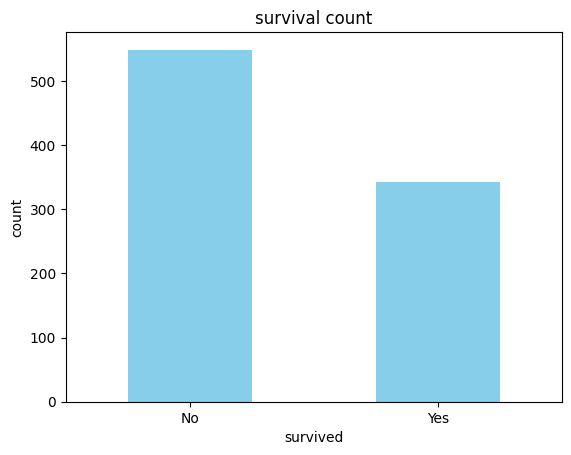

In [6]:
df['Survived'].value_counts().plot(kind='bar',color='skyblue')
plt.title('survival count')
plt.xlabel('survived')
plt.ylabel('count')
plt.xticks([0,1], ['No','Yes'], rotation=0)
plt.show()

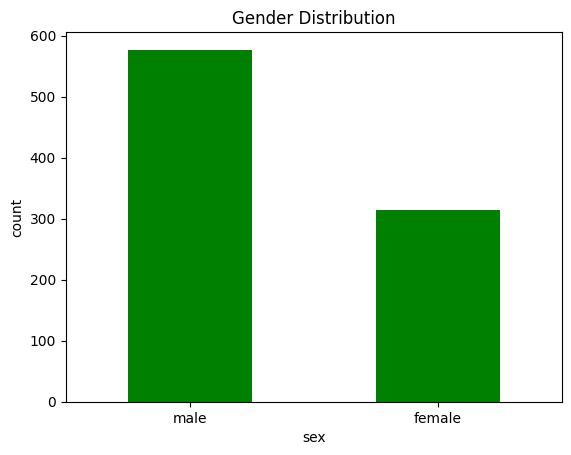

In [7]:
df['Sex'].value_counts().plot(kind='bar',color='green')
plt.title('Gender Distribution')
plt.xlabel('sex')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

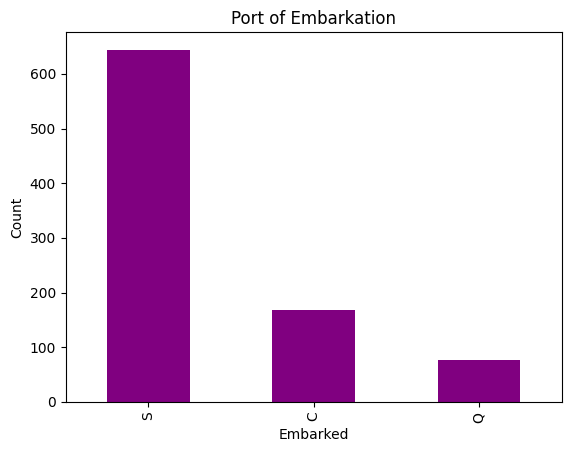

In [8]:
df['Embarked'].value_counts().plot(kind='bar', color='purple')
plt.title('Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

**Plot histograms for numeric distributions.**
1. Age Distribution
2. Fare Distribution

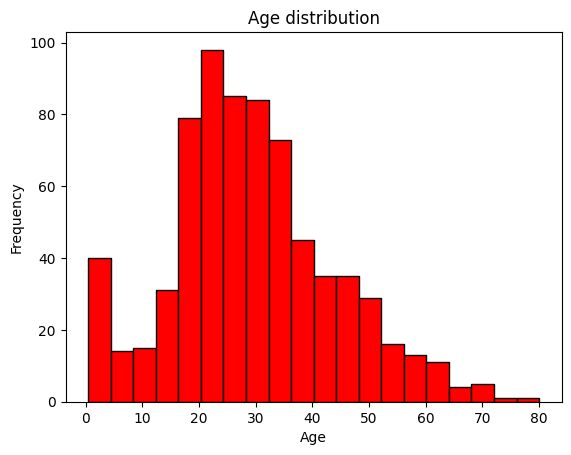

In [9]:
plt.hist(df['Age'], bins=20, color='red',edgecolor='black')
plt.title('Age distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

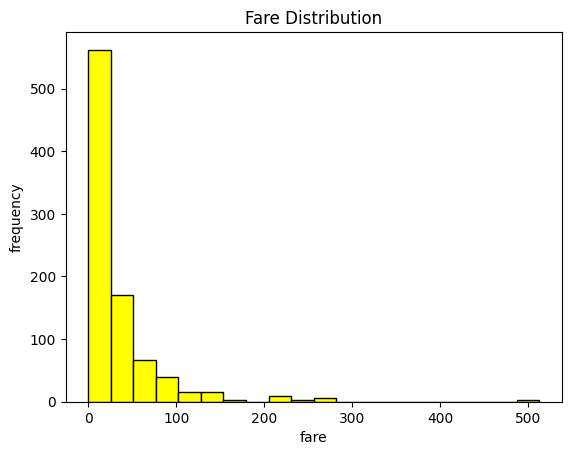

In [10]:
plt.hist(df['Fare'], bins=20, color='yellow', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('fare')
plt.ylabel('frequency')
plt.show()

**Generate a correlation heatmap for numeric features.**
*  compare numeric column data in the dataset and show how strongly they are related

In [14]:
import seaborn as sns

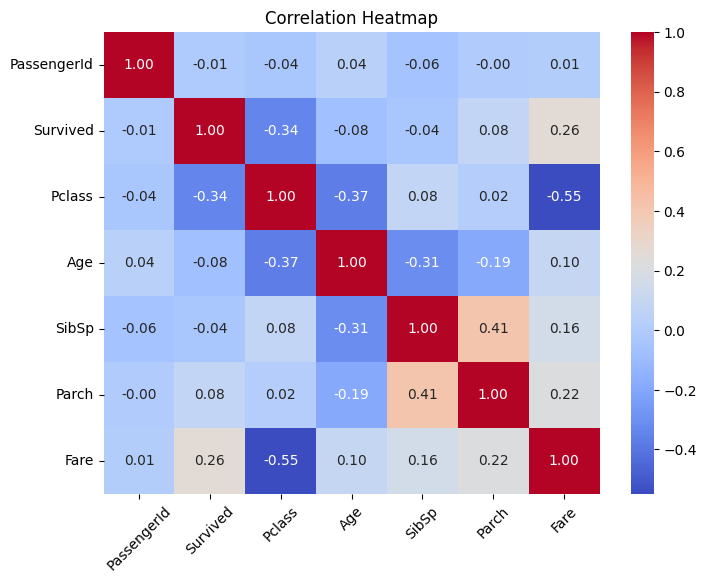

In [16]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

# **Summarize Insights:**

**Document your findings and observations in a clear and concise manner.**

In [17]:
print("EDA Insights Summary:\n")
print("1. Missing values handled: Age (median), Embarked (mode), Cabin dropped.")
print("2. Duplicates removed.")
print("3. Outliers in 'Fare' were removed using the IQR method.")
print("4. Most passengers were male and boarded from port 'S'.")
print("5. Most passengers did not survive.")
print("6. Age and Fare distributions are uneven, with more values on the lower end.")
print("7. Fare is higher for passengers who survived and lower for those in lower classes pclass")

EDA Insights Summary:

1. Missing values handled: Age (median), Embarked (mode), Cabin dropped.
2. Duplicates removed.
3. Outliers in 'Fare' were removed using the IQR method.
4. Most passengers were male and boarded from port 'S'.
5. Most passengers did not survive.
6. Age and Fare distributions are uneven, with more values on the lower end.
7. Fare is higher for passengers who survived and lower for those in lower classes pclass
